In [3]:
import scipy.io
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import logistic
data = scipy.io.loadmat('/Users/Michael/Desktop/Spring2017/CS289/HW6/hw6_data_dist/letters_data.mat')
train_feature = data["train_x"]
length = len(data["train_x"])

#Preprocess data
scaler = preprocessing.StandardScaler().fit(train_feature)
data_prep = scaler.transform(train_feature)
data_train = np.asarray([np.append(data_prep[i],data["train_y"][i]) for i in range(length)])
test_feature = scaler.transform(data['test_x'])

#Partition training and validation set
np.random.shuffle(data_train)
k = math.floor(length*0.8)
training = data_train[0:k,:]
validation = data_train[k:,:]


/Users/Michael/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
def get_loss(images, V, W):
    length_images = np.shape(images)[0]
    Y = np.zeros((26,length_images))
    label = images[:,-1].astype(int)
    for i in range(length_images):
        Y[(label[i]-1)][i] = 1
    z = predict(images,V,W)[1]
    loss_value = -np.sum(np.add(np.multiply(Y,np.log(z)),np.multiply((1-Y),np.log(1-z))))
    return loss_value

In [6]:
def Train_NN(images, rate_v, rate_w, iterations):
    image = images[:,0:(np.shape(images)[1]-1)]
    label = images[:,-1]
    length = np.shape(images)[0]
    V = np.random.randn(200,785)*0.01
    W = np.random.randn(26,201)*0.01
    gradient_V = np.empty((201,785))
    gradient_W = np.empty((26,201))
    loss = list()
    for i in range(iterations):
        index = random.sample(range(length),1)
        feature = np.append(image[index],1).reshape(785,1)
        yj = int(label[index]-1)
        y = np.zeros((26,1))
        y[yj] = 1
        H = np.append(np.tanh(V.dot(feature)),1).reshape(201,1)
        Z = logistic.cdf(W.dot(H)).reshape(26,1)
        L_H = np.transpose(W).dot(Z-y)
        gradient_V = np.multiply(L_H,(np.subtract(1, H**2).reshape(201,1)).dot(np.transpose(feature)))
        gradient_W = (Z-y).dot(np.transpose(H))
        V = V-rate_v*gradient_V[0:200,:]
        W = W-rate_w*gradient_W 
        #Epoch
        if ((i+1)%length==0):
            rate_v = rate_v*0.6
            rate_w = rate_w*0.6
        if (i%10000==0 or i==(iterations-1)):    
            x = get_loss(training, V, W)
            loss.append(x)
    return V, W, loss

In [5]:
#Prediction
def predict(images, V, W):
    length=np.shape(images)[0]
    new=np.append(images[:,0:784],np.ones((length,1)),axis=1).T
    H=np.append(np.tanh(V.dot(new)),np.ones((1,length)),axis=0).reshape(201,length)
    output=logistic.cdf(W.dot(H))
    result=output.argmax(axis=0)+1
    return result,output

In [7]:
train_v,train_w,loss=Train_NN(training,0.001,0.01,500000)

In [40]:
#Training accuracy
t_result = predict(training,train_v,train_w)[0]
t_accuracy = ((t_result==training[:,-1]).sum())/len(training)
t_accuracy

0.91652644230769231

In [28]:
#Validation accuracy
v_result = predict(validation,train_v,train_w)[0]
v_accuracy = ((v_result==validation[:,-1]).sum())/len(validation)
v_accuracy

0.8794471153846154

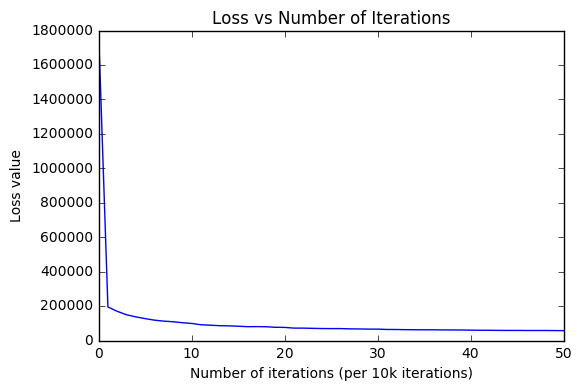

In [9]:
#Plot of loss vs iterations
plt.plot(range(51),loss)
plt.title('Loss vs Number of Iterations')
plt.xlabel('Number of iterations (per 10k iterations)')
plt.ylabel('Loss value')
plt.show()

In [29]:
#Save test featrue for Kaggle
test_result=predict(test_feature,train_v,train_w)[0]
np.savetxt("/Users/Michael/Desktop/Spring2017/CS289/HW6/result.csv",test_result,fmt="%i")

In [73]:
#Find the index misclassified values
np.where(t_result!=training[:,784])

(array([    5,     6,    18, ..., 99775, 99807, 99835]),)

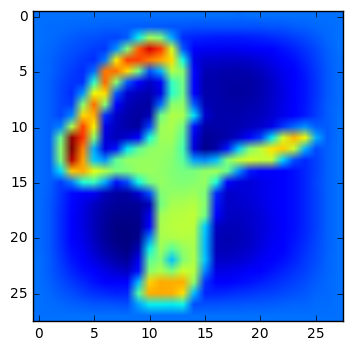

In [75]:
#Visulize correctly classified observations
#1
plt.imshow(training[0,0:784].reshape(28,28))
plt.show()

In [97]:
print("The actual value is:",int(training[0,784]),", which is q.")
print("The classifier classifies it as:",t_result[0],", which is q.")

The actual value is: 17 , which is q.
The classifier classifies it as: 17 , which is q.


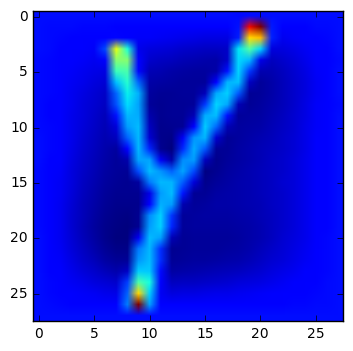

In [76]:
#2
plt.imshow(training[1,0:784].reshape(28,28))
plt.show()

In [96]:
print("The actual value is:",int(training[1,784]),", which is Y.")
print("The classifier classifies it as:",t_result[1],", which is Y.")

The actual value is: 25 , which is Y.
The classifier classifies it as: 25 , which is Y.


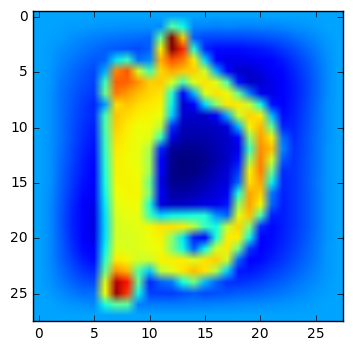

In [92]:
#3
plt.imshow(training[7,0:784].reshape(28,28))
plt.show()

In [95]:
print("The actual value is:",int(training[7,784]),", which is D.")
print("The classifier classifies it as:",t_result[7],", which is D.")

The actual value is: 4 , which is D.
The classifier classifies it as: 4 , which is D.


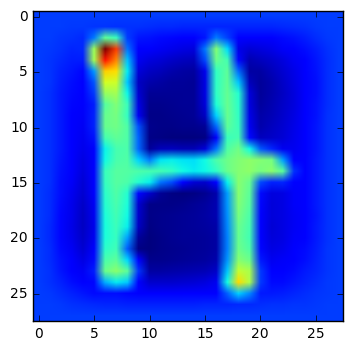

In [87]:
#4
plt.imshow(training[3,0:784].reshape(28,28))
plt.show()

In [91]:
print("The actual value is:",int(training[3,784]),", which is H.")
print("The classifier classifies it as:",t_result[3],", which is H.")

The actual value is: 8 , which is H.
The classifier classifies it as: 8 , which is H.


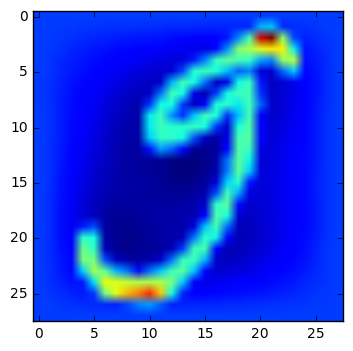

In [88]:
#5
plt.imshow(training[4,0:784].reshape(28,28))
plt.show()

In [121]:
print("The actual value is:",int(training[3,784]),", which is g.")
print("The classifier classifies it as:",t_result[3],", which is g.")

The actual value is: 8 , which is g.
The classifier classifies it as: 8 , which is g.


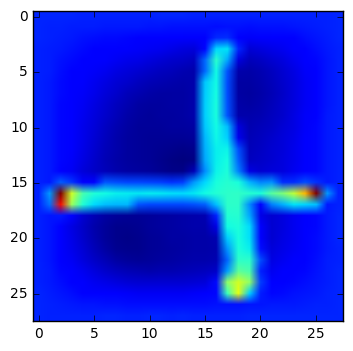

In [100]:
#Visualization of misclassified values
#1
plt.imshow(training[5,0:784].reshape(28,28))
plt.show()

In [101]:
print("The actual value is:",int(training[5,784]),", which is t.")
print("The classifier classifies it as:",t_result[5],", which is D.")

The actual value is: 20 , which is t.
The classifier classifies it as: 4 , which is D.


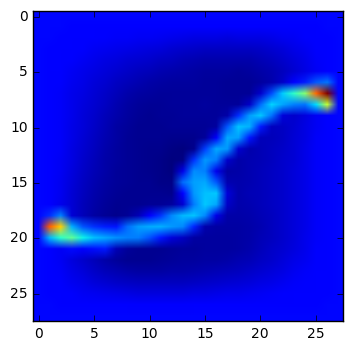

In [102]:
#2
plt.imshow(training[6,0:784].reshape(28,28))
plt.show()

In [104]:
print("The actual value is:",int(training[6,784]),", which is s.")
print("The classifier classifies it as:",t_result[6],", which is J.")

The actual value is: 19 , which is s.
The classifier classifies it as: 10 , which is J.


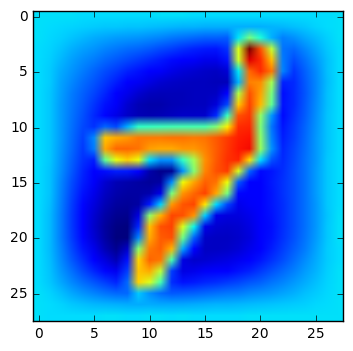

In [106]:
#3
plt.imshow(training[18,0:784].reshape(28,28))
plt.show()

In [107]:
print("The actual value is:",int(training[18,784]),", which is i.")
print("The classifier classifies it as:",t_result[18],", which is t.")

The actual value is: 9 , which is i.
The classifier classifies it as: 20 , which is t.


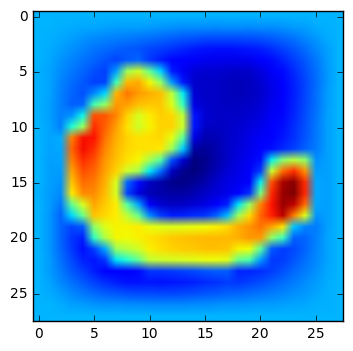

In [108]:
#4
plt.imshow(training[99775,0:784].reshape(28,28))
plt.show()

In [110]:
print("The actual value is:",int(training[99775,784]),", which is c.")
print("The classifier classifies it as:",t_result[99775],", which is e.")

The actual value is: 3 , which is c.
The classifier classifies it as: 5 , which is e.


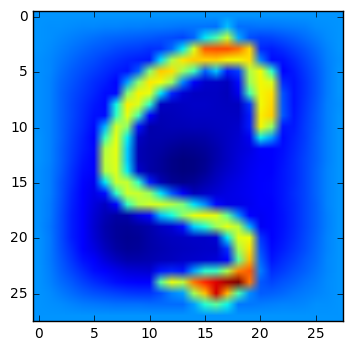

In [111]:
#5
plt.imshow(training[99807,0:784].reshape(28,28))
plt.show()

In [113]:
print("The actual value is:",int(training[99807,784]),", which is s.")
print("The classifier classifies it as:",t_result[99807],", which is c.")

The actual value is: 19 , which is s.
The classifier classifies it as: 3 , which is c.
